# For shopify intern challenge

## **Question 1: Given some sample data, write a program to answer the following: click here to access the required data set**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?


**Explore the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Copy of 2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [3]:
# check the data on hand
df.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


* the original method to get the AOV: total order amount/ total number of order, regardless differences from shops

In [4]:
sum(df.order_amount) / len(df)

3145.128

* taking shop differences into account:
after grouping by each shop, getting the AOV from each shop then take the overall Shopify AOV

In [5]:
df.groupby('shop_id').apply(lambda x: sum(x.order_amount) / sum(x.total_items)).mean()

407.99

* 407.99 looks realistic and better than 3145.128. But we could further look into if there's shops belong to outliers 

In [6]:
# adding new column to see how much it cost for one pair of sneaker in each shop
df['shop_AOV'] = df.order_amount / df.total_items

In [7]:
# check descriptive informaiton for the dataset
df.describe()

,order_id,shop_id,user_id,order_amount,total_items,shop_AOV
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


* Based on the above descriptive information, we can see the mean and median from shop_AOV is not aligned, which means that the data is not well distributed and there might be extreme values as outliers.

In [8]:
# check which shop would be the outlier.
df.groupby('shop_id')[['order_amount','total_items','shop_AOV']].mean().\
sort_values(ascending=[False,False], by=['order_amount','total_items'])

,order_amount,total_items,shop_AOV
shop_id,,,
42,235101.490196,667.901961,352.0
78,49213.043478,1.913043,25725.0
50,403.545455,2.090909,193.0
90,403.224490,2.265306,178.0
38,390.857143,2.057143,190.0
...,...,...,...
53,214.117647,1.911765,112.0
100,213.675000,1.925000,111.0
32,189.976190,1.880952,101.0


* According to above groupby result, shop_id 78 has much more higher shop_AOV than others. This should be the outlier driving up the overall shopify AOV.

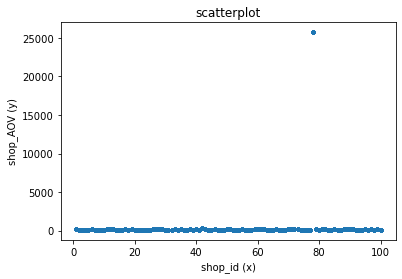

In [9]:
# visualized the dataset, AOV of shop_id 78 is much higher than others
plt.scatter(df[['shop_id']], df.shop_AOV, marker= 'o', s=10, alpha=0.8)
plt.title('scatterplot')
plt.xlabel('shop_id (x)')
plt.ylabel('shop_AOV (y)')
plt.show()

* To see how dataset perform without the outliers

In [10]:
df2 = df[(df.shop_id !=78)].copy()

In [11]:
# check information of new dataset. Now it looks better, mean and median is closer, and std is much smaller than before.
df2.describe()

,order_id,shop_id,user_id,order_amount,total_items,shop_AOV
count,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
mean,2498.990916,49.819540,848.919257,2717.367784,8.851029,152.475575
std,1444.498907,29.014845,87.846007,41155.996469,116.857286,31.260218
min,1.000000,1.000000,607.000000,90.000000,1.000000,90.000000
25%,1248.250000,24.000000,775.000000,163.000000,1.000000,132.000000
50%,2494.500000,50.000000,849.000000,284.000000,2.000000,153.000000
75%,3750.750000,74.000000,925.000000,390.000000,3.000000,168.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.000000,352.000000


* Visualized the new dataset, looks much even than before. Even thought shop_id 42 seems to have higher shop_AOV than others, but we can also see that overall mean and median is similar around 153 from above table. So I kept it.

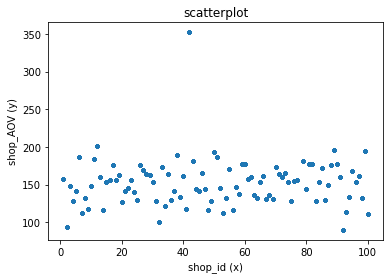

In [12]:
plt.scatter(df2[['shop_id']], df2.shop_AOV, marker= 'o', s=10, alpha=0.8)
plt.title('scatterplot')
plt.xlabel('shop_id (x)')
plt.ylabel('shop_AOV (y)')
plt.show()

* Calculate new average order value(AOV) with new dataset.

In [13]:
print('Reasonable AOV should be: {:.2f}'.format(df2.shop_AOV.sum() / len(df2)))

Reasonable AOV should be: 152.48


* For the outliers, we can also check for their AOV individually.

In [14]:
print('Shop_id 78 AOV: {:.2f}'.format(df[(df.shop_id == 78)].order_amount.sum() / len(df[(df.shop_id == 78)])))

Shop_id 78 AOV: 49213.04


## Therefore, to answer the question 1:
     a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

**OUTLIERS:** Checking all the data description and scatterplot, will find out that there should be outliers from a few shops, having much higher AOV than others, which would be the reason driving up the overall Shopify AOV.  

So, we should do the AOV separately, the reasonable AOV should exclude the shops that have a much AOV,using median and mean values to decide if the AOV is considered to be outlier. 

For the shop(s) having special situations, we could also see how to analyze them once we have more detailed information.


     b. What metric would you report for this dataset?
I’d report the AOV from each shop, Median and Average of the each shop's AOV, with the numbers and figures to help explain. 

     c. What is its value?
     
General and reasonable AOV(G) should be: $152.48

Higher AOV for each shop: $49213.04 (Shop_id 78)